In [1]:
# Imports needed for this exercice 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import hcipy as hc #

In this homework we will reproduce numerically the results from Labeyrie et al. (1970)
https://ui.adsabs.harvard.edu/abs/1970A%26A.....6...85L/abstract

First we will review how the Fourier Transform scales in a multiples and single dish telescopes based on discussions from the lecture. Our notations are:

- $\mathbf{x}$ dimensions in units of length at the location the astrophysical scene $\mathcal{A}$

- $z$ distance from astrophysical scene to observatory 

-  $\mathbf{u}$ dimensions in units of length at plane of observatory $\mathcal{O}$

- $D$ and $f$ are size of telescope aperture and focal length

- $\mathbf{\xi}$ dimensions in units of length at the telescope focus $\mathcal{F}$


We first start with the propagation from the location of astrophysical scene to the plane of observatory, assuming a coherent spatially distributed electrical field (never really happens but let's pretend):

\begin{equation}
E_{\mathcal{O}}(\mathbf{u}) = \frac{1}{\pi \lambda z} \int E_{\mathcal{A}}(\mathbf{x}) e^{- i \frac{2 \pi}{\lambda z} \mathbf{x} \mathbf{u} } d\mathbf{x} 
\end{equation}

Instead of integarting over the physical distance at the location the astrophysical scene, we use the angular size of the astrophysical scene $\mathbf{\alpha}_{z} = \mathbf{x}/z$ and we find:

\begin{equation}
E_{\mathcal{O}}(\mathbf{u}) = FT[E_{\mathcal{A}}(\mathbf{\alpha}_{z})] (\frac{\mathbf{u}}{\lambda})
\end{equation}

If the incoherent case we assume that we have a sum of delta functions and very similar algebra yeilds:


\begin{equation}
I_{\mathcal{O}}(\mathbf{u}) = | FT[I_{\mathcal{A}}(\mathbf{\alpha_{z}})] (\frac{\mathbf{u}}{\lambda}) |
\end{equation}

This is where we find the analogy between the two planes in radio astronomy or interferometry: the plane of the sky, in units of observable angle $\mathbf{\alpha}$ and the plane of the observatory u-v plane, in units of "baseline over wavelength" $\frac{\mathbf{u}}{\lambda}$. 

The relationship between the plane of observatory and the telescope focus is:


\begin{equation}
E_{\mathcal{F}}(\mathbf{\xi}) = \frac{1}{\pi \lambda f} \int E_{\mathcal{O}}(\mathbf{u}) e^{- i \frac{2 \pi}{\lambda f} \mathbf{u} \mathbf{\xi} } d\mathbf{u} 
\end{equation}

We now use the angular size of the focal plane  $\mathbf{\alpha}_{f} = \mathbf{\xi}/f$ and find:

\begin{equation}
E_{\mathcal{F}}(\mathbf{\alpha}_{f}) = FT[E_{\mathcal{O}}(\mathbf{u})] (\frac{\mathbf{\alpha}_{f}}{\lambda})
\end{equation}

Using the expression for the plane of the observatory we derived before we find:

\begin{equation}
E_{\mathcal{F}}(\mathbf{\alpha}_{f}) = FT \left( FT[E_{\mathcal{A}}(\mathbf{\alpha}_{z})] (\frac{\mathbf{u}}{\lambda})\right) (\frac{\mathbf{\alpha}_{f}}{\lambda})
\end{equation}

In virture of the fourier scaling theorem the $\lambda$ s cancel out and we find that in angular units the image of the sky is at the focus of the telescope (with a sign flip if the telesocpe is only one lens):


\begin{equation}
I_{\mathcal{F}}(\mathbf{\alpha}_{f}) = I_{\mathcal{A}}(-\mathbf{\alpha}_{Z})
\end{equation}

However when we want to deal with instrumental (or atmospheric) artifacts seen through a single dish astronomical telescope we usually use slightly different notations:


\begin{equation}
E_{\mathcal{F}}(\mathbf{\xi}) = \frac{1}{\pi \lambda f} \int E_{\mathcal{O}}(\mathbf{u}) e^{- i 2 \pi \lambda f \frac{\mathbf{u}}{D} \frac{\mathbf{\xi} D}{\lambda f} } d\mathbf{u} 
\end{equation}

If we define the dimensions in the plane of the observatory (also called telescope pupil) in units of telescope diameter $\mathcal{v} = \frac{\mathcal{u}}{D}$ and the dimensions in the focal plane is units of the angular resolution of the telescope $\mathbf{\eta} = \frac{\mathbf{\xi} D}{\lambda f} $ then we are working with a very nice set of unitless dimensions:


\begin{equation}
E_{\mathcal{F}}(\mathbf{\eta}) = \frac{1}{\pi \lambda f} \int E_{\mathcal{O}}(D \mathbf{v}) e^{- i 2 \pi \mathbf{v} \mathbf{\eta}} d\mathbf{v} 
\end{equation}

These are the dimensions used in HCIPy when making the focal grid. One can choose to work in units of angular resolution (and to not specify anything in the make_focal_grid function but make sure that pupil_grid diameter is one) or physical units and specify eveyrthing (which is what we will do below). 

# Make the image of a binary star 

The goal is to become familiar with the way physical light is propagated in an instrument. The machine is fourier transforms of course, but the dimensions/scalings can be tricky 

1) The following example shows how to simjulate the Point Spread Function of a 5 m telescope, with a 71.5 m focal length, at 750 nm, all the way to the 30 th airy ring with a sampling of 2 pixels per airy ring. Repeat the same thing using generic coordinates (eg units of angular resolution). 

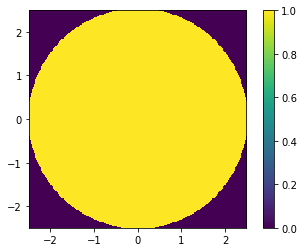

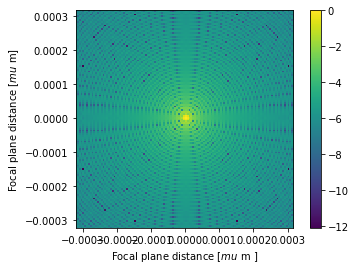

In [2]:
Npup = 256
D_tel = 5
f = 71.5
wavelength =  750e-9
pupil_grid = hc.field.make_pupil_grid(Npup, diameter=D_tel)
circular_aperture_object =  hc.aperture.circular_aperture(D_tel, center=[0,0]) # We use the center option to create the apertures
telescope_pupil = circular_aperture_object(pupil_grid)
plt.figure()
im = hc.imshow_field(telescope_pupil)
plt.colorbar()
plt.show()
wavefront = hc.Wavefront(telescope_pupil,wavelength)
focal_grid = hc.make_focal_grid(q=2, num_airy=30,pupil_diameter=D_tel, focal_length=f, reference_wavelength=wavelength)
prop = hc.FraunhoferPropagator(pupil_grid, focal_grid,focal_length=f)
focal_image = prop.forward(wavefront)
plt.figure()
hc.imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()))
plt.xlabel('Focal plane distance [$mu$ m ]')
plt.ylabel('Focal plane distance [$mu$ m]')
plt.colorbar()
plt.show()

2) Using this, create a simulated image of a binary system with a second star at $5 \lambda /D$ (using in generic coordinates). The tricky part is to get the right slope for the phase ramp before the Fourier transform. You will know you will get it right when the second star lands on the 5 th Airy ring. 

3) Same exercise but this time in physical coordinates

# Make the image of a binary star behind telescope turbulence 

This is how one case define the main charateristic of atmospheric turbulence. If you can curious you can read one of the great classics
https://www.sciencedirect.com/science/article/abs/pii/S007966380870204X?via%3Dihub

In [13]:
seeing = 1.4 # arcsec @ 500nm (convention)
outer_scale = 40 # meter
tau0 = 0.005 # seconds
fried_parameter = hc.seeing_to_fried_parameter(seeing)
Cn_squared = hc.Cn_squared_from_fried_parameter(fried_parameter, 500e-9)
velocity = 0.314 * fried_parameter / tau0
print('r0   = {0:.1f}cm'.format(fried_parameter * 100))
print('L0   = {0:.1f}m'.format(outer_scale))
print('tau0 = {0:.1f}ms'.format(tau0 * 1000))
print('v    = {0:.1f}m/s'.format(velocity))

r0   = 7.2cm
L0   = 40.0m
tau0 = 5.0ms
v    = 4.5m/s


4) $r_0$ is the equivalent size of a telescope if observations were diffraction limited. Could resolve our hypothetical binary star at 5 $\lambda/D$ on a 5 m telescope?


This is how we generaty synthetic phase screens representtaive of Kolmogorov  turbulence in one layer of the atmosphere. We work in physical units here. 

In [14]:
Npup = 256
D_tel = 5
f = 71.5
wavelength =  750e-9
pupil_grid = hc.field.make_pupil_grid(Npup, diameter=D_tel)
circular_aperture_object =  hc.aperture.circular_aperture(D_tel, center=[0,0]) # We use the center option to create the apertures
telescope_pupil = circular_aperture_object(pupil_grid)
wavefront = hc.Wavefront(telescope_pupil,wavelength)
focal_grid = hc.make_focal_grid(q=2, num_airy=30,pupil_diameter=D_tel, focal_length=f, reference_wavelength=wavelength)
prop = hc.FraunhoferPropagator(pupil_grid, focal_grid,focal_length=f)
layer = hc.InfiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

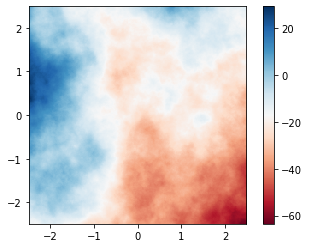

In [15]:
phase_screen_phase = layer.phase_for(wavelength) # in radian
hc.imshow_field(phase_screen_phase, cmap='RdBu')
plt.colorbar()

This is how we make  the layer moves across the telescope aperture

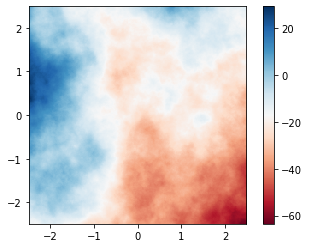

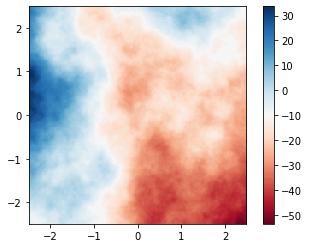

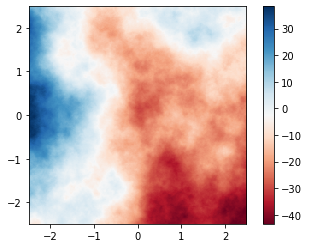

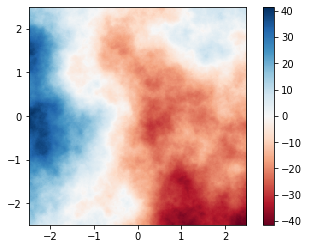

In [16]:
layer.t = 0
phase_screen_phase = layer.phase_for(wavelength) # in radian
plt.figure()
hc.imshow_field(phase_screen_phase, cmap='RdBu')
plt.colorbar()
layer.t = 0.1
phase_screen_phase = layer.phase_for(wavelength) # in radian
plt.figure()
hc.imshow_field(phase_screen_phase, cmap='RdBu')
plt.colorbar()
layer.t = 0.2
phase_screen_phase = layer.phase_for(wavelength) # in radian
plt.figure()
hc.imshow_field(phase_screen_phase, cmap='RdBu')
plt.colorbar()
layer.t = 0.3
phase_screen_phase = layer.phase_for(wavelength) # in radian
plt.figure()
hc.imshow_field(phase_screen_phase, cmap='RdBu')
plt.colorbar()

## Combine results from previous sections to demonstrate how speckles imaging works

5) Based on all that was done so far. Reproduce the results from Labeyrie et al. 1970. For debuging purposes you can first ignore the atmosphere and simply fourier transform the results from question 3 (or two) to get a feel for what is going on. There is little guidance by design. We will go over it in class. 

6) Explore brightness ratio of binary, serpations, atmopsphrice conditions and averaging of images and discuss how some of these various paramters qualitively change the SNR of a detction. 